


## **Practice 02_1 Define loss function and optimizer with Keras**

practice with small data set

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/miokobayashii/summerschool2022/blob/main/day01/Practice01_ANN.ipynb)


<img src="https://docs.google.com/uc?id=1F55coG7rc2RWMBSVgoUy_3haGRUP63R8" width="500">


### Build a model

In [67]:
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential

from keras.optimizers import adam_v2

from tensorflow.keras import initializers
from keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [60]:
model = Sequential()

model.add(Dense(4, input_shape=(2,)))

# Leaky ReLU activation
model.add(LeakyReLU(alpha=0.01))

model.add(Dense(1, activation='sigmoid'))


### Setting of a loss function and optimizer. Adam is a variant of stochastic gradient descent. 

In [61]:
model.compile(
    optimizer=adam_v2.Adam(learning_rate=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

## **Practice 02_2 Training process with iris dataset**

###As a training data set, we use Iris data. 

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: \
      -- Iris Setosa \
      -- Iris Versicolour \
      -- Iris Virginica

We will use "Petal length" and "Petal width" for input data, \
and we define that if the input values represents \
iris "Setosa", output y = 1, otherwise, 0. 

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Iris_dataset_scatterplot.svg" width="500">

Setosa 
<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="100"> 
Versicolor 
<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" width="100">
Virginica 
<img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" width="100">

In [141]:
iris = datasets.load_iris() # load data
x = iris.data   # features of iris
y = iris.target # label 0, 1, 2

# Label: Setosa = 0, Versicolor or Virginica = 1
y = np.where(y == 2, 1, y)


In [ ]:
print(x)

### Extract "Petal length x[:,2]" and "Petal width x[:,3]"

In [136]:
x = np.array(x[:,2:])

In [142]:
## if you want to extract x[:,0] and x[:,3]
x = np.array(x[:, [0, 3]])

In [143]:
x.shape

(150, 2)

### Split data to training data and test data. With training data, we train the mode, and then, test the accuracy of the model with test data

In [144]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size=0.8)  

### We can train the model with "model.fit()"

In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=8)

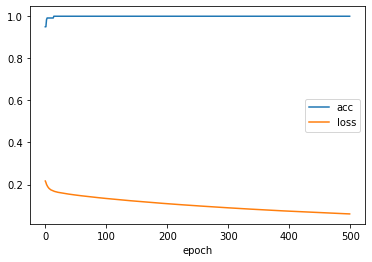

In [146]:
plt.plot(history.epoch, history.history["accuracy"], label="acc")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

In [156]:
# Evaluation with test data
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss", score[0])
print("Test accuracy", score[1])

# Test inidividual data
print("====================================")
print("-----------correct answer-----------")
print(y_test[0])
print(y_test[7])
print("-----------predict answer-----------")
print(np.round(model.predict(x_test)[0]))
print(np.round(model.predict(x_test)[7]))

1/1 [==============================] - 0s 39ms/step - loss: 0.0559 - accuracy: 1.0000
Test loss 0.05589159205555916
Test accuracy 1.0
-----------correct answer-----------
1
0
-----------predict answer-----------
[1.]
[0.]


About accuracy: https://keras.io/api/metrics/accuracy_metrics/

## Please write down your consideration and comments here:




